<a href="https://colab.research.google.com/github/MohdShariqMalik/MohdShariqMalik/blob/main/Skin_cancer_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import** **libraries** 

In [27]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator



**Image Preprocessing**

In [28]:

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/my projects/skin cancer detection/data/train', target_size = (256,256), batch_size = 12, color_mode = 'rgb', class_mode = 'binary')
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/my projects/skin cancer detection/data/test', target_size = (256,256), batch_size = 12, color_mode = 'rgb', class_mode = 'binary')


Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [29]:
img1 = cv2.imread('/content/drive/MyDrive/my projects/skin cancer detection/dummy/30.jpg')
img2 = cv2.imread('/content/drive/MyDrive/my projects/skin cancer detection/dummy/37.jpg')
img3 = cv2.imread('/content/drive/MyDrive/my projects/skin cancer detection/dummy/5.jpg')
img4 = cv2.imread('/content/drive/MyDrive/my projects/skin cancer detection/dummy/84.jpg')
img5 = cv2.imread('/content/drive/MyDrive/my projects/skin cancer detection/dummy/95.jpg')


**Model Creation**

In [30]:
classifier = Sequential()

**CNN Layers**

In [31]:

classifier.add(Conv2D(64, 3, 3, input_shape=(256,256,3), activation = 'relu'))
classifier.add(MaxPool2D(pool_size = (2,2)))


classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPool2D(pool_size = (2,2)))

classifier.add(Flatten())
classifier.add(Dense(64, activation = 'relu'))
classifier.add(Dense(128, activation = 'relu'))
classifier.add(Dense(32, activation = 'relu'))
classifier.add(Dense(1, activation = 'sigmoid'))


In [32]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [33]:
history = classifier.fit_generator(training_set, steps_per_epoch=60, epochs = 10, validation_data=test_set)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
60/60 [==============================] - 18s 283ms/step - loss: 0.7032 - accuracy: 0.5149 - val_loss: 0.6901 - val_accuracy: 0.5424
Epoch 2/10
60/60 [==============================] - 17s 277ms/step - loss: 0.6754 - accuracy: 0.5651 - val_loss: 0.6195 - val_accuracy: 0.5682
Epoch 3/10
60/60 [==============================] - 16s 259ms/step - loss: 0.6104 - accuracy: 0.6087 - val_loss: 0.4729 - val_accuracy: 0.7591
Epoch 4/10
60/60 [==============================] - 15s 258ms/step - loss: 0.4973 - accuracy: 0.7666 - val_loss: 0.5546 - val_accuracy: 0.7773
Epoch 5/10
60/60 [==============================] - 16s 262ms/step - loss: 0.5186 - accuracy: 0.7495 - val_loss: 0.4608 - val_accuracy: 0.7606
Epoch 6/10
60/60 [==============================] - 16s 259ms/step - loss: 0.4799 - accuracy: 0.7513 - val_loss: 0.4304 - val_accuracy: 0.7636
Epoch 7/10
60/60 [==============================] - 15s 258ms/step - loss: 0.4983 - accuracy: 0.7692 - val_loss: 0.4369 - val_accuracy: 0.7773

**Model evaluation**

In [34]:
classifier.evaluate(test_set)


55/55 [==============================] - 3s 58ms/step - loss: 0.4187 - accuracy: 0.7970


[0.4187396466732025, 0.7969697117805481]

**Graph plots**

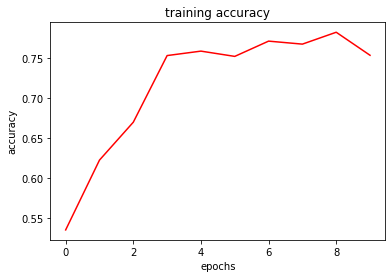

In [35]:
plt.plot(history.history['accuracy'],'r')
plt.title('training accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

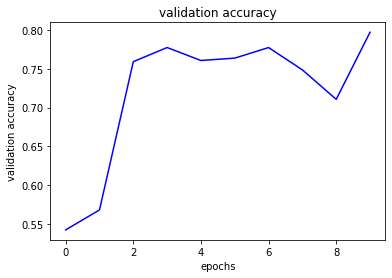

In [36]:
plt.plot(history.history['val_accuracy'],'b')
plt.title('validation accuracy')
plt.xlabel('epochs')
plt.ylabel('validation accuracy')
plt.show()

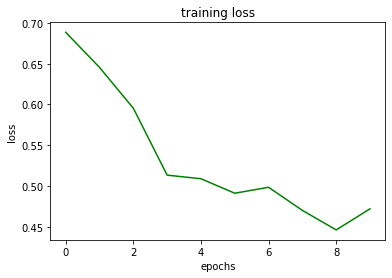

In [37]:
plt.plot(history.history['loss'],'g')
plt.title('training loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

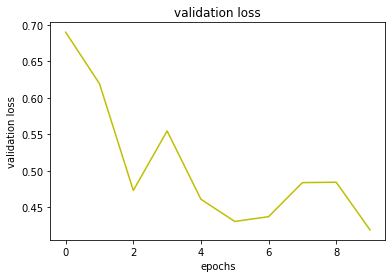

In [38]:
plt.plot(history.history['val_loss'], 'y')
plt.title('validation loss')
plt.xlabel('epochs')
plt.ylabel('validation loss')
plt.show()

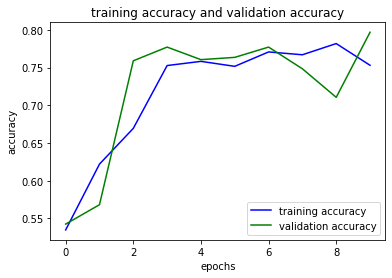

In [39]:
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
plt.plot(training_accuracy,'b', label = 'training accuracy')
plt.plot(validation_accuracy,'g', label = 'validation accuracy')
plt.title('training accuracy and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

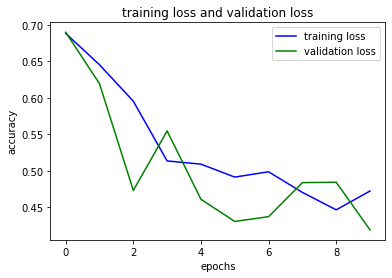

In [40]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
plt.plot(training_loss,'b', label = 'training loss')
plt.plot(validation_loss,'g', label = 'validation loss')
plt.title('training loss and validation loss')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()